# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import math

# Reading the CSV file

In [4]:
df = pd.read_csv("fraudTrain.csv")
df.T.head(23)

,0,1,2,3,4,5,6,7,8,9,...,1296665,1296666,1296667,1296668,1296669,1296670,1296671,1296672,1296673,1296674
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,1296665,1296666,1296667,1296668,1296669,1296670,1296671,1296672,1296673,1296674
trans_date_trans_time,2019-01-01 00:00:18,2019-01-01 00:00:44,2019-01-01 00:00:51,2019-01-01 00:01:16,2019-01-01 00:03:06,2019-01-01 00:04:08,2019-01-01 00:04:42,2019-01-01 00:05:08,2019-01-01 00:05:18,2019-01-01 00:06:01,...,2020-06-21 12:08:42,2020-06-21 12:09:22,2020-06-21 12:10:56,2020-06-21 12:11:23,2020-06-21 12:11:36,2020-06-21 12:12:08,2020-06-21 12:12:19,2020-06-21 12:12:32,2020-06-21 12:13:36,2020-06-21 12:13:37
cc_num,2703186189652095,630423337322,38859492057661,3534093764340240,375534208663984,4767265376804500,30074693890476,6011360759745864,4922710831011201,2720830304681674,...,213193596103206,4587657402165341815,4822367783500458,213141712584544,4400011257587661852,30263540414123,6011149206456997,3514865930894695,2720012583106919,4292902571056973207
merchant,"fraud_Rippin, Kub and Mann","fraud_Heller, Gutmann and Zieme",fraud_Lind-Buckridge,"fraud_Kutch, Hermiston and Farrell",fraud_Keeling-Crist,"fraud_Stroman, Hudson and Erdman",fraud_Rowe-Vandervort,fraud_Corwin-Collins,fraud_Herzog Ltd,"fraud_Schoen, Kuphal and Nitzsche",...,fraud_Gulgowski LLC,"fraud_Hyatt, Russel and Gleichner","fraud_Hahn, Douglas and Schowalter","fraud_Metz, Russel and Metz",fraud_Stiedemann Inc,fraud_Reichel Inc,fraud_Abernathy and Sons,fraud_Stiedemann Ltd,"fraud_Reinger, Weissnat and Strosin","fraud_Langosh, Wintheiser and Hyatt"
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos,gas_transport,grocery_net,gas_transport,misc_pos,grocery_pos,...,home,health_fitness,travel,kids_pets,misc_pos,entertainment,food_dining,food_dining,food_dining,food_dining
amt,4.97,107.23,220.11,45.0,41.96,94.63,44.54,71.65,4.27,198.39,...,72.17,7.3,19.71,100.85,37.38,15.56,51.7,105.93,74.9,4.3
first,Jennifer,Stephanie,Edward,Jeremy,Tyler,Jennifer,Kelsey,Steven,Heather,Melissa,...,James,Amber,Christopher,Margaret,Marissa,Erik,Jeffrey,Christopher,Joseph,Jeffrey
last,Banks,Gill,Sanchez,White,Garcia,Conner,Richards,Williams,Chase,Aguilar,...,Hunt,Lewis,Farrell,Curtis,Powell,Patterson,White,Castaneda,Murray,Smith
gender,F,F,M,M,M,F,F,M,F,F,...,M,F,M,F,F,M,M,M,M,M
street,561 Perry Cove,43039 Riley Greens Suite 393,594 White Dale Suite 530,9443 Cynthia Court Apt. 038,408 Bradley Rest,4655 David Island,889 Sarah Station Suite 624,231 Flores Pass Suite 720,6888 Hicks Stream Suite 954,21326 Taylor Squares Suite 708,...,7369 Gabriel Tunnel,6296 John Keys Suite 858,97070 Anderson Land,742 Oneill Shore,474 Allen Haven,162 Jessica Row Apt. 072,8617 Holmes Terrace Suite 651,1632 Cohen Drive Suite 639,42933 Ryan Underpass,135 Joseph Mountains


# Finding out each columns name

In [6]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# Shape of dataset

In [8]:
df.shape

(1296675, 23)

# Check for missing values

In [10]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Check for duplicate rows in dataset

In [12]:
df.duplicated().sum()

0

# Ensuring data in columns have appropriate data type for analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1296675.0,6.483370e+05,3.743180e+05,0.000000e+00,3.241685e+05,6.483370e+05,9.725055e+05,1.296674e+06
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01


# Check for na missing values

In [17]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# To check if each column has the same data type

In [19]:
for col in df.columns:
    print(f"{col}: {df[col].apply(type).nunique()} unique types")

Unnamed: 0: 1 unique types
trans_date_trans_time: 1 unique types
cc_num: 1 unique types
merchant: 1 unique types
category: 1 unique types
amt: 1 unique types
first: 1 unique types
last: 1 unique types
gender: 1 unique types
street: 1 unique types
city: 1 unique types
state: 1 unique types
zip: 1 unique types
lat: 1 unique types
long: 1 unique types
city_pop: 1 unique types
job: 1 unique types
dob: 1 unique types
trans_num: 1 unique types
unix_time: 1 unique types
merch_lat: 1 unique types
merch_long: 1 unique types
is_fraud: 1 unique types


# To check for columns with constant values

In [21]:
for col in df.select_dtypes(exclude=['object']):
    if df[col].nunique() == 1:
        print(f"Column '{col}' has a single unique value.")
    else:
        print(f"Column '{col}' has {df[col].nunique()} unique values.")

Column 'Unnamed: 0' has 1296675 unique values.
Column 'cc_num' has 983 unique values.
Column 'amt' has 52928 unique values.
Column 'zip' has 970 unique values.
Column 'lat' has 968 unique values.
Column 'long' has 969 unique values.
Column 'city_pop' has 879 unique values.
Column 'unix_time' has 1274823 unique values.
Column 'merch_lat' has 1247805 unique values.
Column 'merch_long' has 1275745 unique values.
Column 'is_fraud' has 2 unique values.


In [22]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

# Correlation of values

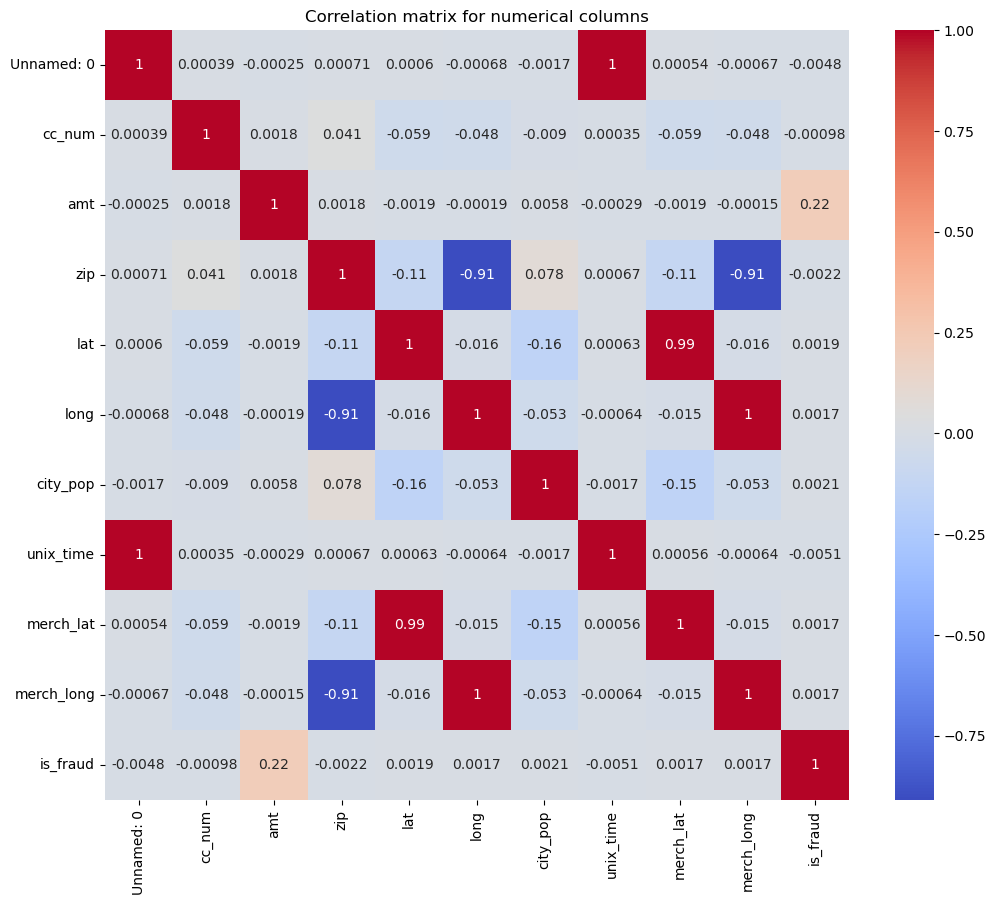

In [24]:
# Choose only numerical values columns
df_numerical = df.select_dtypes(include=[np.number])


plt.figure(figsize=(12,10))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix for numerical columns")
plt.show()

In [25]:
# Check class distribution
class_distribution = df['is_fraud'].value_counts(normalize=True)

print("Class Distribution (%):")
print(class_distribution * 100)

Class Distribution (%):
is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64


# Key summary:
> No Missing values data set;
> 
> No duplicated values/rows;
> 
> trans_date_trans_time and dob are in object format, we will have to change it to DateTime Format for EDA and preprocessing;
> 
> All the input data columns are of continuous numeric data. There are no columns with constant values;
> 
> is_fraud is target variable

# Exploratory Data Analysis (EDA)

# First, create a copy of the dataset for all eda showcase.

In [29]:
df_for_eda = df.copy()
df_for_eda.head(1)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0


# Now we have to convert trans_date_trans_time to datetime format

In [31]:
df_for_eda['trans_date_trans_time'] = pd.to_datetime(df_for_eda['trans_date_trans_time'])

df_for_eda['transaction_HOUR'] = df_for_eda['trans_date_trans_time'].dt.hour

df_for_eda['day_of_WEEK'] = df_for_eda['trans_date_trans_time'].dt.day_name()

df_for_eda['transaction_MONTH'] = df_for_eda['trans_date_trans_time'].dt.month

df_for_eda['is_WEEKEND'] = df_for_eda['trans_date_trans_time'].dt.weekday.isin([5, 6]).astype(int)

def categorize_daytiming(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    elif 21 <= hour or hour < 5:
        return 'Night'

df_for_eda['day_TIMING'] = df_for_eda['transaction_HOUR'].apply(categorize_daytiming)

df_for_eda[['transaction_HOUR', 'day_of_WEEK', 'transaction_MONTH', 'day_TIMING', 'is_WEEKEND']].head()

,transaction_HOUR,day_of_WEEK,transaction_MONTH,day_TIMING,is_WEEKEND
0,0,Tuesday,1,Night,0
1,0,Tuesday,1,Night,0
2,0,Tuesday,1,Night,0
3,0,Tuesday,1,Night,0
4,0,Tuesday,1,Night,0


# We would also do the same for DOB, to change DOB to datetime format

In [33]:
df_for_eda['dob'] = pd.to_datetime(df_for_eda['dob'], errors='coerce')

# Calculate age as of January 30, 2025
reference_date = datetime(2025, 1, 30) 
df_for_eda['age'] = (reference_date - df_for_eda['dob']).dt.days // 365 

df_for_eda['age'].describe()

count    1.296675e+06
mean     5.085907e+01
std      1.740296e+01
min      2.000000e+01
25%      3.700000e+01
50%      4.900000e+01
75%      6.200000e+01
max      1.000000e+02
Name: age, dtype: float64

# Creating a more detailed age group column

In [35]:
def categorize_age_group(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 17:
        return 'Teenager'
    elif 18 <= age <= 25:
        return 'Young Adult'
    elif 26 <= age <= 40:
        return 'Adult'
    elif 41 <= age <= 60:
        return 'Middle-Aged'
    elif 61 <= age <= 80:
        return 'Senior'
    else:
        return 'Elderly'

df_for_eda['age_group'] = df_for_eda['age'].apply(categorize_age_group)


df_for_eda[['age', 'age_group']].head()

,age,age_group
0,36,Adult
1,46,Middle-Aged
2,63,Senior
3,58,Middle-Aged
4,38,Adult


#  Now we will calculate distance between cardholder and merchant

In [37]:
def calculate_distance(X, lat_col, long_col, merch_lat_col, merch_long_col, new_column):
    
    X = X.copy()

    lat1 = np.radians(X[lat_col])
    lon1 = np.radians(X[long_col])
    lat2 = np.radians(X[merch_lat_col])
    lon2 = np.radians(X[merch_long_col])
    
    # Haversine formula to calculate distance
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    R = 6371  # Radius of the Earth in kilometers
    X[new_column] = R * c  # Distance in kilometers

    return X

In [38]:

df_for_eda = calculate_distance(df_for_eda, 'lat', 'long', 'merch_lat', 'merch_long', 'distance')

# Display the new 'distance' column
df_for_eda[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head()

,lat,long,merch_lat,merch_long,distance
0,36.0788,-81.1781,36.011293,-82.048315,78.597568
1,48.8878,-118.2105,49.159047,-118.186462,30.212176
2,42.1808,-112.2620,43.150704,-112.154481,108.206083
3,46.2306,-112.1138,47.034331,-112.561071,95.673231
4,38.4207,-79.4629,38.674999,-78.632459,77.556744


In [39]:
df_for_eda['distance'].describe()

count    1.296675e+06
mean     7.611465e+01
std      2.911693e+01
min      2.225452e-02
25%      5.533491e+01
50%      7.823175e+01
75%      9.850327e+01
max      1.521172e+02
Name: distance, dtype: float64

# Now we will create bins for city population

In [41]:
city_pop_bins = [0, 10000, 50000, 100000, 500000, 1000000, np.inf]
city_pop_labels = ['<10K', '10K-50K', '50K-100K', '100K-500K', '500K-1M', '>1M']

# Bin the 'city_pop' column
df_for_eda['city_pop_bin'] = pd.cut(df_for_eda['city_pop'], bins=city_pop_bins, labels=city_pop_labels)

# Now we will drop unwanteded columns for EDA

In [43]:
columns_to_remove = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
        'first', 'last',  'street', 'city', 'state', 'zip',
       'lat', 'long',  'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long'
]


df_for_eda.drop(columns=columns_to_remove, inplace=True)

In [44]:
df_for_eda.columns

Index(['category', 'amt', 'gender', 'city_pop', 'is_fraud', 'transaction_HOUR',
       'day_of_WEEK', 'transaction_MONTH', 'is_WEEKEND', 'day_TIMING', 'age',
       'age_group', 'distance', 'city_pop_bin'],
      dtype='object')

# Now we will start with our EDA. Firstly, the distribution of target variable of is_fraud is:

C:\Users\Joshua Leong\AppData\Local\Temp\ipykernel_6028\3726995150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df_for_eda , palette='viridis')


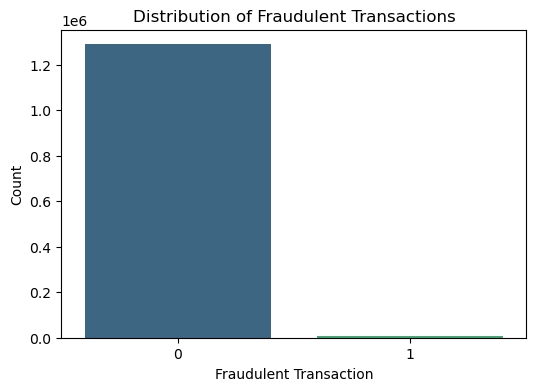

In [46]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df_for_eda , palette='viridis')
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Fraudulent Transaction')
plt.ylabel('Count')
plt.show()

# As we can see from the graph above, there are alot more non fraudulent transactions then fraudulent transactions, which cause the dataset to be imbalanced. So what is the distribution of transaction amount

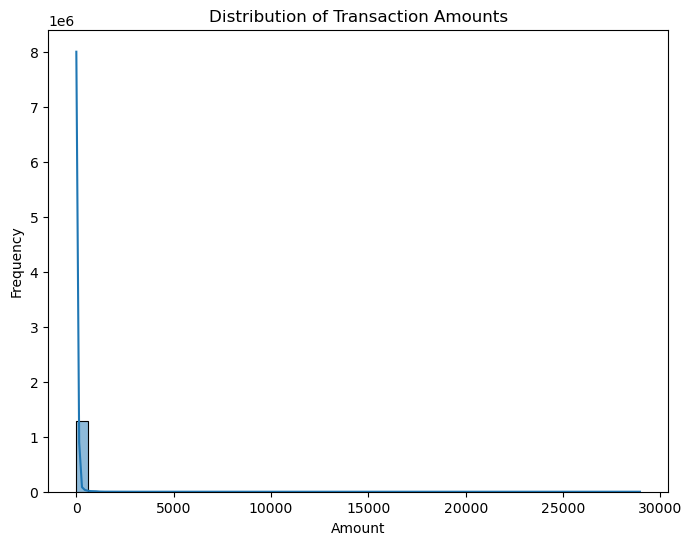

In [48]:
plt.figure(figsize=(8, 6))
sns.histplot(df_for_eda['amt'], kde=True, bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# The transaction amounts shows that there are a large number of small transactions and few large transactions. From the first and second graph, this could possibly indicate that large transactions are potentially fraudulent activity
> So what is the average amount transacted that are fruad and non-fraud?

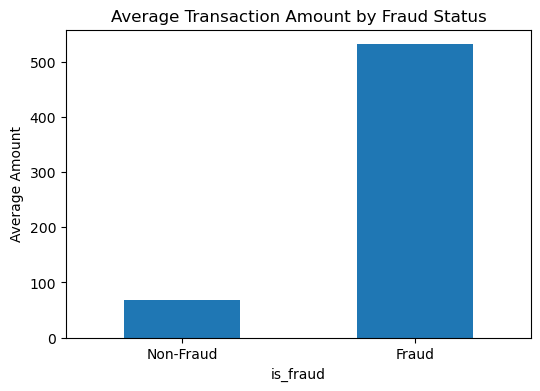

In [50]:
avg_amt_fraud = df_for_eda.groupby('is_fraud')['amt'].mean()


avg_amt_fraud.plot(kind='bar', figsize=(6, 4))
plt.title('Average Transaction Amount by Fraud Status')
plt.ylabel('Average Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

# The fraudulent transactions show a higher average amount.
> How does the day of the week affect the occurrence of fraud?

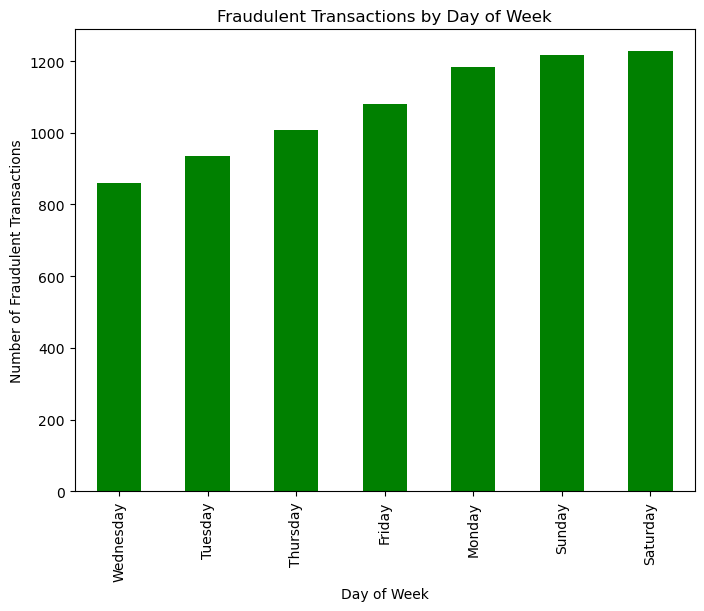

In [52]:
fraud_by_day = df_for_eda.groupby('day_of_WEEK')['is_fraud'].sum()

plt.figure(figsize=(8, 6))
fraud_by_day.sort_values().plot(kind='bar', color='green')
plt.title('Fraudulent Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

# This shows that fraudulant transactions occur more during the weekend and monday
**Is there a correlation between age and fraud transactions?**

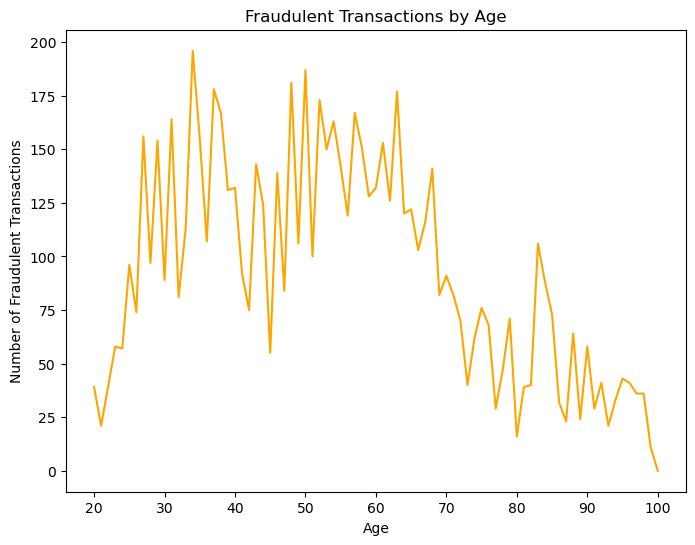

In [54]:
fraud_by_age = df_for_eda.groupby('age')['is_fraud'].sum()

plt.figure(figsize=(8, 6))
fraud_by_age.plot(kind='line', color='orange')
plt.title('Fraudulent Transactions by Age')
plt.xlabel('Age')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

# Highest number of fraud transaction occur usually within age 30 to age 40
**How does the timing of the day relate with fraud?**

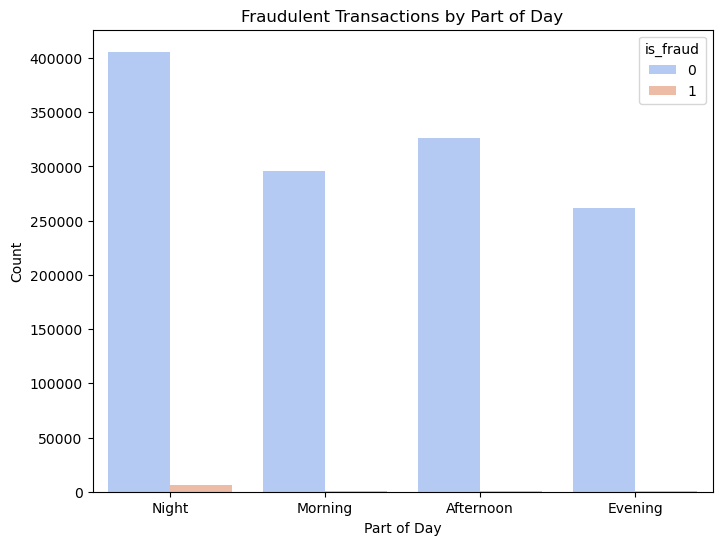

In [56]:
plt.figure(figsize=(8, 6))
sns.countplot(x='day_TIMING', hue='is_fraud', data=df_for_eda, palette='coolwarm')
plt.title('Fraudulent Transactions by Part of Day')
plt.xlabel('Part of Day')
plt.ylabel('Count')
plt.show()

# This shows that fraudulent transactions happens very often in night time compared to the rest of the day
**So during which hour does fraudulent transaction really happen often?**

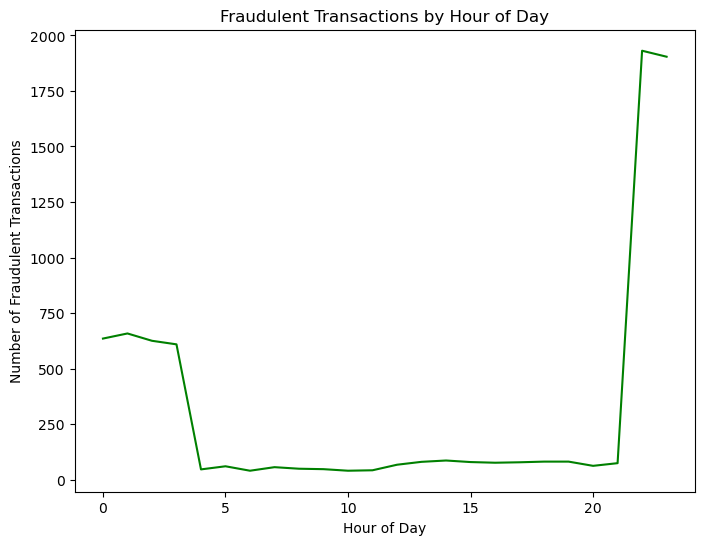

In [58]:
fraud_by_hour = df_for_eda.groupby('transaction_HOUR')['is_fraud'].sum()

plt.figure(figsize=(8, 6))
fraud_by_hour.plot(kind='line', color='green')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

# This shows that the fraudulent transactions are happening more on 22nd hour and also happen quite a few from midnight to 4th hour
**How does age group affect fraud occurences? Does it happen within young adults, or more towards elderly?**

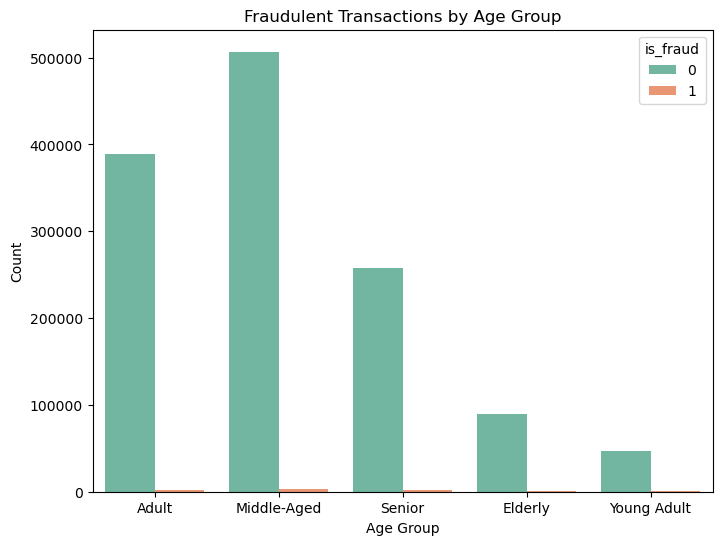

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', hue='is_fraud', data=df_for_eda, palette='Set2')
plt.title('Fraudulent Transactions by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# This shows that fraudulent transactions happen more within middle-aged group of people
**So are there any correlation between distance of merchant and cardholder and fraud activities? Does far distance usually indicate fraud?**

C:\Users\Joshua Leong\AppData\Local\Temp\ipykernel_6028\1772917706.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_distance_bin = df_for_eda.groupby('distance_bin')['is_fraud'].sum()


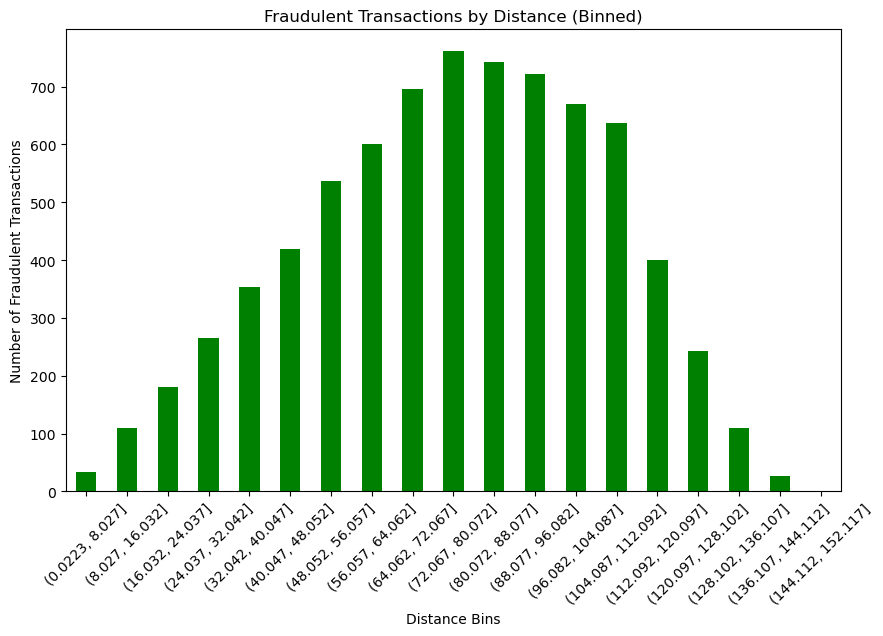

In [62]:
distance_bins = np.linspace(df_for_eda['distance'].min(), df_for_eda['distance'].max(), num=20)
# Bin the 'distance' column
df_for_eda['distance_bin'] = pd.cut(df_for_eda['distance'], bins=distance_bins)

# Group by distance bins and calculate the sum of fraudulent transactions
fraud_by_distance_bin = df_for_eda.groupby('distance_bin')['is_fraud'].sum()

# Plot the result
plt.figure(figsize=(10, 6))
fraud_by_distance_bin.plot(kind='bar', color='green')
plt.title('Fraudulent Transactions by Distance (Binned)')
plt.xlabel('Distance Bins')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

# The fraudulent transactions are higher around 64-80km distance.
**What is the relationship between city_pop and fraud?**

C:\Users\Joshua Leong\AppData\Local\Temp\ipykernel_6028\3318142288.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_city_pop_bin = df_for_eda.groupby('city_pop_bin')['is_fraud'].sum()


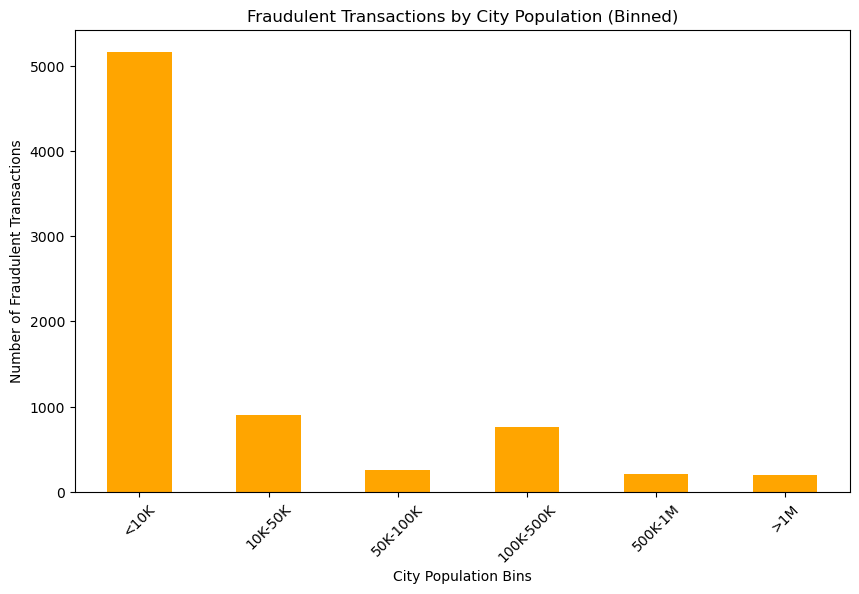

In [64]:
# Group by the 'city_pop_bin' and calculate the sum of fraudulent transactions
fraud_by_city_pop_bin = df_for_eda.groupby('city_pop_bin')['is_fraud'].sum()

# Plot the result as a bar plot
plt.figure(figsize=(10, 6))
fraud_by_city_pop_bin.plot(kind='bar', color='orange')
plt.title('Fraudulent Transactions by City Population (Binned)')
plt.xlabel('City Population Bins')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

# City with lower population have higher fraud transaction, and cities with 100k-500k population have more fraud transaction then 50k-100k and cities with more than 500k population

There are 7 numerical features 'amt', 'city_pop', 'transaction_hour', 'transaction_month', 'is_weekend', 'age', 'distance'

There are 3 discrete numerical features : 'transaction_hour', 'transaction_month', 'is_weekend'

There are 4 continuos numerical features : 'amt', 'city_pop', 'age', 'distance'

There are 4 categorical features : 'gender', 'day_of_week', 'part_of_day', 'age_group'

In [67]:
numerical_features = ['amt', 'city_pop', 'transaction_hour', 'transaction_month', 'is_weekend', 'age', 'distance']
discrete_numerical_features = [ 'transaction_hour', 'transaction_month', 'is_weekend']
continuous_numerical_features = ['amt', 'city_pop', 'age', 'distance']
categorical_features = ['gender', 'day_of_week', 'part_of_day', 'age_group']


# First we will see the boxplot of continuous_numerical_features

In [69]:
def plot_boxplot(feature):
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        y=df_for_eda[feature], 
        notch=True,  # Add notch to the boxplot
        showcaps=False,  # Hide the caps
        flierprops={"marker": "x", "color": "r", "markersize": 8},  # Customize outliers
        boxprops={"facecolor": (.3, .5, .7, .5)},  # Set the box color with transparency
        medianprops={"color": "r", "linewidth": 2},  # Customize the median line
        whiskerprops={"color": "black", "linewidth": 1.5},  # Customize whiskers
        width=0.4  # Shrink the box width
    )
    plt.title(f'Boxplot for {feature}')
    plt.xlabel('')
    plt.ylabel(feature)
    plt.show()

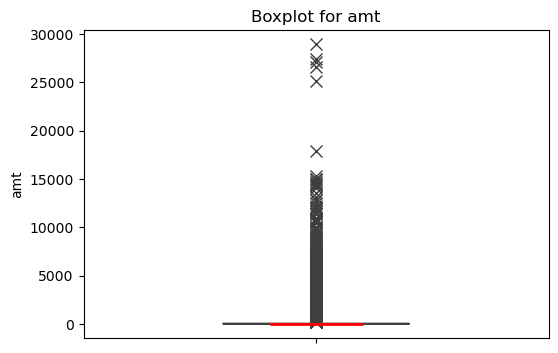

In [70]:
plot_boxplot("amt")

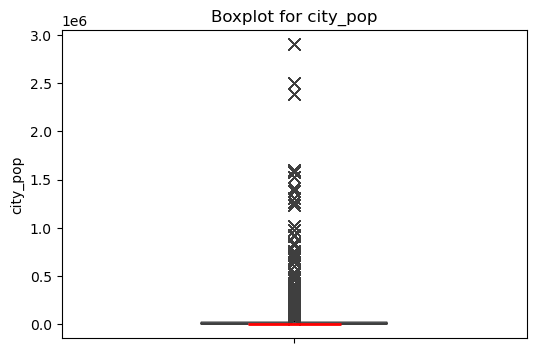

In [71]:
plot_boxplot("city_pop")

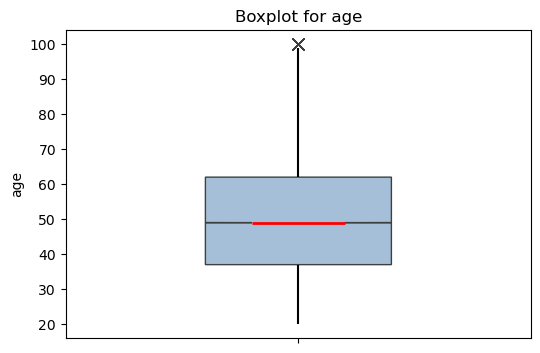

In [72]:
plot_boxplot("age")

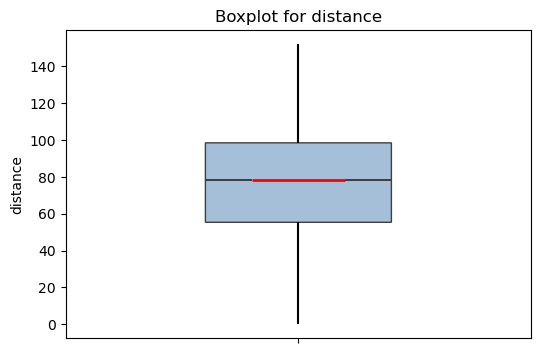

In [73]:
plot_boxplot("distance")

# Now we will see histograms of continuous numerical features

In [75]:
def plot_histogram(feature, bins=10):
    plt.figure(figsize=(6, 4))
    sns.histplot(df_for_eda[feature], bins=bins, kde=True, color="blue", alpha=0.6)
    plt.title(f'Histogram for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

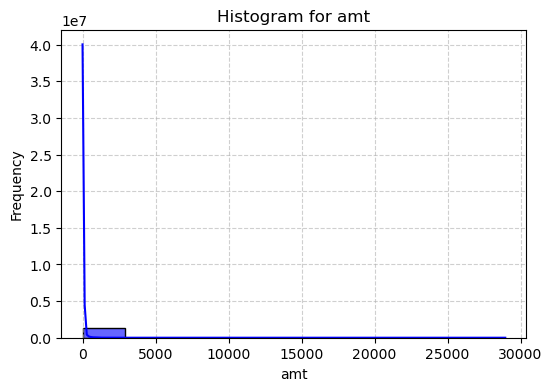

In [76]:
plot_histogram("amt")

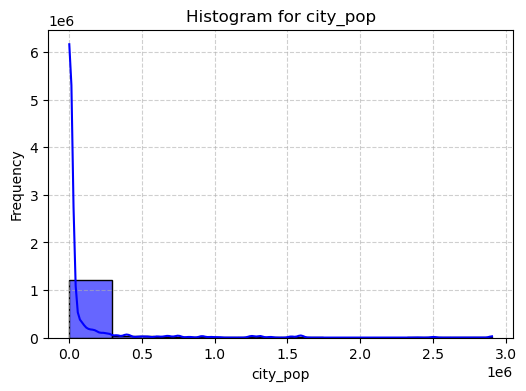

In [77]:
plot_histogram("city_pop")

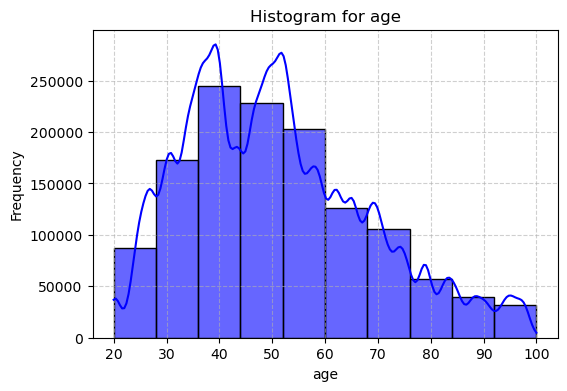

In [78]:
plot_histogram("age")

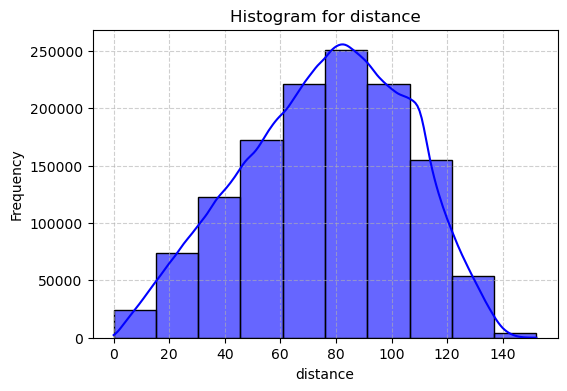

In [79]:
plot_histogram("distance")

# From the information above, the amt column and city_pop is highly skewed

In [81]:
a = df_for_eda

In [82]:
a.columns

Index(['category', 'amt', 'gender', 'city_pop', 'is_fraud', 'transaction_HOUR',
       'day_of_WEEK', 'transaction_MONTH', 'is_WEEKEND', 'day_TIMING', 'age',
       'age_group', 'distance', 'city_pop_bin', 'distance_bin'],
      dtype='object')

In [83]:
a.head()

,category,amt,gender,city_pop,is_fraud,transaction_HOUR,day_of_WEEK,transaction_MONTH,is_WEEKEND,day_TIMING,age,age_group,distance,city_pop_bin,distance_bin
0,misc_net,4.97,F,3495,0,0,Tuesday,1,0,Night,36,Adult,78.597568,<10K,"(72.067, 80.072]"
1,grocery_pos,107.23,F,149,0,0,Tuesday,1,0,Night,46,Middle-Aged,30.212176,<10K,"(24.037, 32.042]"
2,entertainment,220.11,M,4154,0,0,Tuesday,1,0,Night,63,Senior,108.206083,<10K,"(104.087, 112.092]"
3,gas_transport,45.00,M,1939,0,0,Tuesday,1,0,Night,58,Middle-Aged,95.673231,<10K,"(88.077, 96.082]"
4,misc_pos,41.96,M,99,0,0,Tuesday,1,0,Night,38,Adult,77.556744,<10K,"(72.067, 80.072]"


In [84]:
a.nunique()

category                  14
amt                    52928
gender                     2
city_pop                 879
is_fraud                   2
transaction_HOUR          24
day_of_WEEK                7
transaction_MONTH         12
is_WEEKEND                 2
day_TIMING                 4
age                       80
age_group                  5
distance             1296675
city_pop_bin               6
distance_bin              19
dtype: int64

# Logistic Regression

> Logistic Regression is used as we will be classifying the "is_fraud" with either be True or False

# Preparing the Dataset for Logistic Regression using One-Hot Encoding

In [88]:
c = a['is_fraud'] #c variable contains data to be predicted

#encoding non-numeric data, b varaible contains all data used for machine learning
b = pd.get_dummies(a, columns=['day_of_WEEK'], drop_first=True)
b = pd.get_dummies(b, columns=['gender'], drop_first=True)
b = pd.get_dummies(b, columns=['day_TIMING'], drop_first=True)
b = pd.get_dummies(b, columns=['age_group'], drop_first=True)
b = pd.get_dummies(b, columns=['category'], drop_first=True)
b = pd.get_dummies(b, columns=['city_pop_bin'], drop_first=True)
b = pd.get_dummies(b, columns=['distance_bin'], drop_first=True)
b = b.drop('city_pop',axis=1)
b = b.drop('distance',axis=1)
b = b.drop('is_fraud',axis=1) #drops the dependent variable "is_fraud" from the other variables
b.iloc[0]

amt                                 4.97
transaction_HOUR                       0
transaction_MONTH                      1
is_WEEKEND                             0
age                                   36
day_of_WEEK_Monday                 False
day_of_WEEK_Saturday               False
day_of_WEEK_Sunday                 False
day_of_WEEK_Thursday               False
day_of_WEEK_Tuesday                 True
day_of_WEEK_Wednesday              False
gender_M                           False
day_TIMING_Evening                 False
day_TIMING_Morning                 False
day_TIMING_Night                    True
age_group_Elderly                  False
age_group_Middle-Aged              False
age_group_Senior                   False
age_group_Young Adult              False
category_food_dining               False
category_gas_transport             False
category_grocery_net               False
category_grocery_pos               False
category_health_fitness            False
category_home   

# Performing train test spliting  on the data

In [90]:
from sklearn.model_selection import train_test_split
b_train, b_test, c_train, c_test = train_test_split(b, c, test_size=0.1, random_state=101)

# Creating a StandardScaler object and normalizing the training and testing data

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
b_train_scaled = scaler.fit_transform(b_train)
b_test_scaled = scaler.transform(b_test)

# Creating a Logistic Regression model and training it

In [94]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(b_train_scaled, c_train)

LogisticRegression()

# Model predictions

In [96]:
c_pred = model.predict(b_test_scaled)

#count the number of "fradulent" transactions in the test data
z = 0
for i in c_pred:
    if i == 1:
        z+=1
        
print("Total number of cases: {}\nNumber of predicted Fradulent cases: {}".format(len(c_pred),z))

Total number of cases: 129668
Number of predicted Fradulent cases: 162


# Model Evaluation using Confusion Matrix

In [98]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm = pd.DataFrame(confusion_matrix(c_test, c_pred), index=['actual_no', 'actual_fraud'], columns=['predicted_no', 'predicted_fraud'])
cm

,predicted_no,predicted_fraud
actual_no,128834,62
actual_fraud,672,100


# Graphical View of Confusion Matrix

<Figure size 640x480 with 0 Axes>

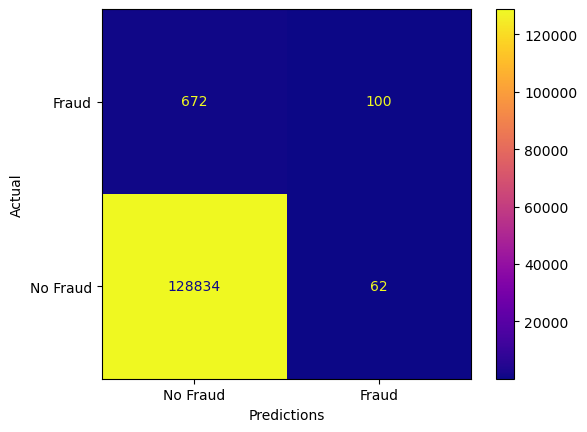

In [100]:
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix(c_test, c_pred), display_labels=['No Fraud', 'Fraud'])
disp.plot(cmap='plasma', values_format='d', colorbar=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.gca().invert_yaxis()
plt.show()

# Creating Functions to calculate the Precision, Recall, F1 Score and Accuracy

In [102]:
def prec(TP, FP, TN, FN): #Function for Precision
    p = TP/(TP+FP)
    return p;
def rec(TP, FP, TN, FN): #Function for Recall
    r = TP/(TP+FN)
    return r;
def fs(TP, FP, TN, FN): #Function for F1 Score
    p = prec(TP, FP, TN, FN)
    r = rec(TP, FP, TN, FN)
    f1 = 2*((p*r)/(p+r))
    return f1;
def acc(TP, FP, TN, FN): #Function for Accuracy
    a = (TP+TN)/(TP+TN+FN+FP)
    return a;

In [103]:
cm

,predicted_no,predicted_fraud
actual_no,128834,62
actual_fraud,672,100


# Calculation for predicted "fraud"

In [105]:
p = prec(100, 62, 128832, 677) #Calculating precision
r = rec(100, 62, 128832, 677) #Calculating recall
f = fs(100, 62, 128832, 677) #Calculating f1-score
a = acc(100, 62, 128832, 677) #Calculating accuracy
print("Precision: {:.2f}\nRecall: {:.2f}\nF1-Score: {:.2f}\nAccuracy: {:.2f}".format(p,r,f,a))

Precision: 0.62
Recall: 0.13
F1-Score: 0.21
Accuracy: 0.99


# Calculation for predicted "not fraud"

In [107]:
#values of "True positive" and "False positive" swapped to calculate for "not fraud"
p = prec(128832, 677, 100, 62) #Calculating precision
r = rec(128832, 677, 100, 62) #Calculating recall
f = fs(128832, 677, 100, 62) #Calculating f1-score
a = acc(128832, 677, 100, 62) #Calculating accuracy
print("Precision: {:.2f}\nRecall: {:.2f}\nF1-Score: {:.2f}\nAccuracy: {:.2f}".format(p,r,f,a))

Precision: 0.99
Recall: 1.00
F1-Score: 1.00
Accuracy: 0.99


# Classification report on the results

> We can deduce the calculated values above and that of the classification report below do match

In [110]:
print(classification_report(c_test, c_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    128896
           1       0.62      0.13      0.21       772

    accuracy                           0.99    129668
   macro avg       0.81      0.56      0.61    129668
weighted avg       0.99      0.99      0.99    129668



# From the above classification report, we can see that the precision and recall of fraud indentification is quite low. The most significant is recall, showing that only 0.12 (12%) of actual fraud cases were correctly identified, which is incredibly low. The f1-score is also really low (20%), showing a poor balance between precision and recall. Therefore, we will attempt to balance out the f1-score for fraud identification.

# Optimizing the Logistic Regression parameters

In [113]:
lr = LogisticRegression(class_weight={0:1,1:15}, C=1.0, max_iter=5000)
lr.fit(b_train,c_train)

LogisticRegression(class_weight={0: 1, 1: 15}, max_iter=5000)

> The above class weight specifies that detecting "fraud" should be prioritised more than "not fraud".

In [115]:
pred = lr.predict(b_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Figure size 640x480 with 0 Axes>

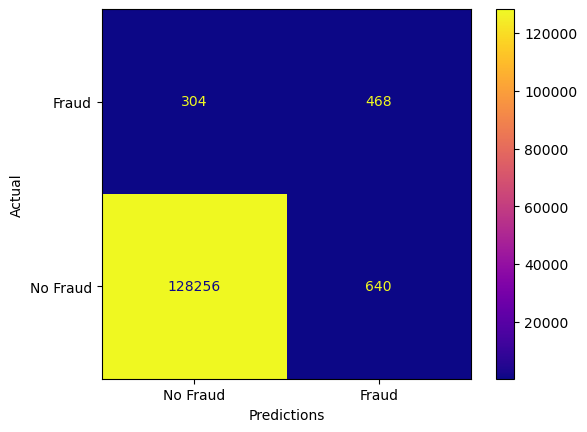

In [116]:
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix(c_test, pred), display_labels=['No Fraud', 'Fraud'])
disp.plot(cmap='plasma', values_format='d', colorbar=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.gca().invert_yaxis()
plt.show()

In [117]:
print(classification_report(c_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    128896
           1       0.42      0.61      0.50       772

    accuracy                           0.99    129668
   macro avg       0.71      0.80      0.75    129668
weighted avg       0.99      0.99      0.99    129668



# The classification report above contains the highest f1-score out of multiple tests. 